In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import sklearn.model_selection as ms
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [345]:
dt = pd.read_csv('NCV_DecisionTree2.csv')
nb = pd.read_csv('CV_NaiveBayes.csv')
nn = pd.read_csv('NCV_NuralNetworks_Structure.csv')
svm = pd.read_csv('NCV_SVM.csv')
rf = pd.read_csv('NCV_DecisionForest_Trees_Features.csv')

In [346]:
def clean_combs(clf):
    combs = np.array(clf['combs'])
    feature_combs = []
    for item in combs:
        item = item.replace('(', '')
        item = item.replace(')', '')
        item = item.replace('[', '')
        item = item.replace(']', '')
        item = item.replace(',', '')
        item = item.replace('\"', '')
        item = item.replace('\'', '')
        item = item.split()
        feature_combs.append(str(item))
    return feature_combs


In [347]:
def clean_list(lst):
    feature_combs = []
    for item in lst:
        item = item.replace('(', '')
        item = item.replace(')', '')
        item = item.replace('[', '')
        item = item.replace(']', '')
        item = item.replace(',', '')
        item = item.replace('\"', '')
        item = item.replace('\'', '')
        #item = item.split()
        feature_combs.append(str(item))
    return feature_combs

In [348]:
dt = dt.drop(columns=['Unnamed: 0', 'est_max_features', 'est_max_depth', 'cv_mean', 'cv_std', 'CV_accuracy'])
dt['combs'] = clean_combs(dt)
dt['clf'] = ['DT' for x in range(len(dt))]
dt = dt.sort_values(by='accuracy', ascending=False)
print(dt.shape)
dt

(55, 4)


,size,accuracy,combs,clf
1,7,0.7690,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",DT
13,7,0.7676,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",DT
29,9,0.7666,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",DT
27,8,0.7664,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",DT
9,7,0.7662,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",DT
7,8,0.7656,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",DT
18,7,0.7652,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",DT
17,5,0.7652,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",DT
0,6,0.7650,"['NumberChildrenAtHome', 'Sex', 'Married', 'In...",DT
48,11,0.7646,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",DT


In [349]:
dt_size_group = dt.groupby(['size']).mean()
dt_size_group = dt_size_group.sort_values(by='accuracy', ascending=False)
dt_size_group

,accuracy
size,
7,0.764833
12,0.762600
11,0.760800
8,0.760240
6,0.758525
9,0.757900
5,0.757343
10,0.757200
4,0.743350


In [350]:
dt_group_max = dt.groupby(['size']).head(1)
dt_group_max = dt_group_max.sort_values(by='accuracy', ascending=False)
dt_group_max = dt_group_max.groupby(['size']).mean()
dt_group_max = dt_group_max.sort_values(by='accuracy', ascending=False)
dt_group_max

,accuracy
size,
7,0.7690
9,0.7666
8,0.7664
5,0.7652
6,0.7650
11,0.7646
10,0.7630
12,0.7626
4,0.7546


In [351]:
nb['combs'] = clean_combs(nb)

nb = nb.drop(columns=['Unnamed: 0'])
nb = nb.sort_values(by='accuracy', ascending=False)
nb_top10 = nb.head(10)
nb = nb.iloc[10:]
nb = nb.sort_values(by='accuracy', ascending=False)

frames = []
frames.append(nb_top10)

nb_top_feat = nb.groupby('size').head(4)
frames.append(nb_top_feat)
nb = pd.concat(frames)

nb['clf'] = ['NB' for x in range(len(nb))]
print(nb.shape)
nb

(55, 4)


,size,accuracy,combs,clf
3946,9,0.783275,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",NB
3572,8,0.783100,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",NB
3781,8,0.782975,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",NB
4028,10,0.782975,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
3242,7,0.782950,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",NB
3811,9,0.782900,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
3763,8,0.782875,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",NB
3973,9,0.782850,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",NB
3646,8,0.782700,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",NB
3050,7,0.782675,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",NB


In [352]:
nb_size_group = nb.groupby(['size']).mean()
nb_size_group = nb_size_group.sort_values(by='accuracy', ascending=False)
nb_size_group

,accuracy
size,
8,0.782669
9,0.782636
7,0.782575
6,0.782237
10,0.781880
5,0.780281
4,0.779587
11,0.778338
3,0.777425


In [353]:
nb_group_max = nb.groupby(['size']).head(1)
nb_group_max = nb_group_max.sort_values(by='accuracy', ascending=False)
nb_group_max = nb_group_max.groupby(['size']).mean()
nb_group_max = nb_group_max.sort_values(by='accuracy', ascending=False)
nb_group_max

,accuracy
size,
9,0.783275
8,0.783100
10,0.782975
7,0.782950
6,0.782425
5,0.780925
11,0.780750
4,0.779600
3,0.779350


In [354]:
nn = nn.drop(columns=['Unnamed: 0', 'est_hidden_layer_sizes', 'cv_mean', 'cv_std'])
print(nn.shape)
nn = nn.sort_values(by='accuracy', ascending=False)
nn_top10 = nn.head(10)
nn = nn.iloc[10:]
nn = nn.sort_values(by='accuracy', ascending=False)

frames = []
frames.append(nn_top10)

nn_top_feat = nn.groupby('size').head(4)
frames.append(nn_top_feat)
nn = pd.concat(frames)

nn['combs'] = clean_combs(nn)
nn['clf'] = ['NN' for x in range(len(nn))]
print(nn.shape)
nn

(114, 3)
(54, 4)


,size,accuracy,combs,clf
46,11,0.7754,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",NN
91,9,0.7734,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",NN
25,9,0.7730,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",NN
99,9,0.7716,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",NN
58,10,0.7712,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NN
84,11,0.7702,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NN
51,12,0.7700,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NN
71,7,0.7696,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",NN
77,10,0.7688,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NN
33,9,0.7680,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",NN


In [355]:
nn_size_group = nn.groupby(['size']).mean()
nn_size_group = nn_size_group.sort_values(by='accuracy', ascending=False)
nn_size_group

,accuracy
size,
12,0.770000
9,0.768575
11,0.767233
10,0.767033
7,0.766040
8,0.764400
6,0.763200
5,0.759850
4,0.759850


In [356]:
nn_group_max = nn.groupby(['size']).head(1)
nn_group_max = nn_group_max.sort_values(by='accuracy', ascending=False)
nn_group_max = nn_group_max.groupby(['size']).mean()
nn_group_max = nn_group_max.sort_values(by='accuracy', ascending=False)
nn_group_max

,accuracy
size,
11,0.7754
9,0.7734
10,0.7712
12,0.7700
7,0.7696
8,0.7666
6,0.7648
4,0.7642
5,0.7616


In [357]:
svm = svm.drop(columns=['Unnamed: 0', 'est_C', 'cv_mean', 'est_gamma', 'cv_std', 'CV_accuracy'])
svm['clf'] = ['SVM' for x in range(len(svm))]
svm['combs'] = clean_combs(svm)
svm = svm.sort_values(by='accuracy', ascending=False)
print(svm.shape)
svm

(55, 4)


,size,accuracy,combs,clf
9,7,0.7930,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
0,9,0.7922,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
21,8,0.7904,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
3,10,0.7902,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
31,7,0.7896,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
6,8,0.7894,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
32,7,0.7882,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
16,7,0.7880,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
10,9,0.7876,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
11,11,0.7874,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM


In [358]:
svm_size_group = svm.groupby(['size']).mean()
svm_size_group = svm_size_group.sort_values(by='accuracy', ascending=False)
svm_size_group

,accuracy
size,
7,0.786233
10,0.785800
11,0.784280
12,0.784200
9,0.784200
6,0.782850
8,0.782086
5,0.779500
4,0.776200


In [359]:
svm_group_max = svm.groupby(['size']).head(1)
svm_group_max = svm_group_max.sort_values(by='accuracy', ascending=False)
svm_group_max = svm_group_max.groupby(['size']).mean()
svm_group_max = svm_group_max.sort_values(by='accuracy', ascending=False)
svm_group_max

,accuracy
size,
7,0.7930
9,0.7922
8,0.7904
10,0.7902
11,0.7874
5,0.7850
6,0.7850
12,0.7842
4,0.7776


In [360]:
rf = rf.drop(columns=['Unnamed: 0', 'est_max_features', 'est_n_estimators', 'cv_mean', 'cv_std', 'CV_accuracy'])
rf['clf'] = ['RF' for x in range(len(rf))]
rf['combs'] = clean_combs(rf)
rf = rf.sort_values(by='accuracy', ascending=False)
print(rf.shape)
rf

(55, 4)


,size,accuracy,combs,clf
46,11,0.7748,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",RF
19,8,0.7710,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",RF
1,7,0.7698,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",RF
41,10,0.7696,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",RF
6,6,0.7694,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",RF
49,11,0.7692,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",RF
33,9,0.7690,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",RF
38,10,0.7688,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",RF
14,6,0.7686,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",RF
39,10,0.7678,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",RF


In [361]:
rf_size_group = rf.groupby(['size']).mean()
rf_size_group = rf_size_group.sort_values(by='accuracy', ascending=False)
rf_size_group

,accuracy
size,
11,0.768700
10,0.768400
12,0.767400
9,0.766100
8,0.765600
7,0.763333
6,0.762100
5,0.757543
4,0.743350


In [362]:
rf_group_max = rf.groupby(['size']).head(1)
rf_group_max = rf_group_max.sort_values(by='accuracy', ascending=False)
rf_group_max = rf_group_max.groupby(['size']).mean()
rf_group_max = rf_group_max.sort_values(by='accuracy', ascending=False)
rf_group_max

,accuracy
size,
11,0.7748
8,0.7710
7,0.7698
10,0.7696
6,0.7694
9,0.7690
12,0.7674
5,0.7656
4,0.7528


In [363]:
dt_group_max = dt_group_max.sort_values(by='size', ascending=True)
svm_group_max = svm_group_max.sort_values(by='size', ascending=True)
nb_group_max = nb_group_max.sort_values(by='size', ascending=True)
nn_group_max = nn_group_max.sort_values(by='size', ascending=True)
rf_group_max = rf_group_max.sort_values(by='size', ascending=True)

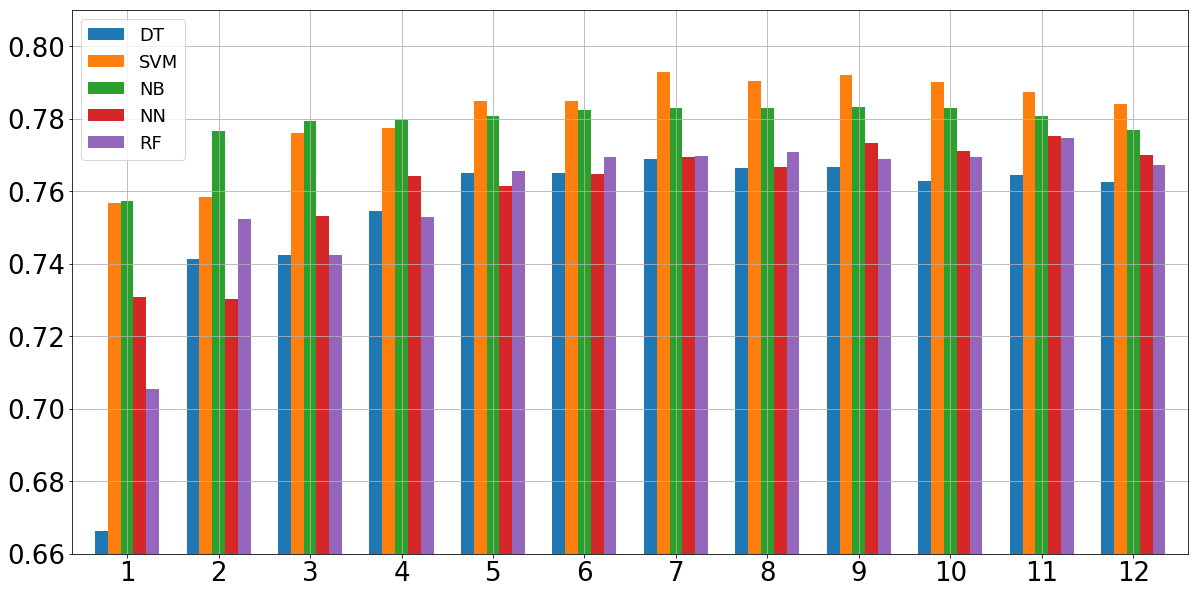

In [364]:
lst = []
for i in range(12):
    temp = []
    temp.append(dt_group_max['accuracy'].values[i])
    temp.append(svm_group_max['accuracy'].values[i])
    temp.append(nb_group_max['accuracy'].values[i])
    temp.append(nn_group_max['accuracy'].values[i])
    temp.append(rf_group_max['accuracy'].values[i])
    lst.append(temp)
        
        

df = pd.DataFrame(lst, columns=['DT', 'SVM', 'NB', 'NN', 'RF'], index= [1,2,3,4,5,6,7,8,9,10,11,12])
df.plot.bar(ylim=(0.66,0.81), figsize=(20,10),width=0.70, rot=0)
plt.grid(zorder=0)
plt.legend(loc='upper left')#, bbox_to_anchor=(0, 0.5))
plt.tick_params(axis='x', labelsize=26)
plt.tick_params(axis='y', labelsize=26)
plt.legend(loc=2, prop={'size': 18})

plt.show()

#df.plot.bar();

In [365]:
dt_size_group = dt_size_group.sort_values(by='size', ascending=True)
svm_size_group = svm_size_group.sort_values(by='size', ascending=True)
nb_size_group = nb_size_group.sort_values(by='size', ascending=True)
nn_size_group = nn_size_group.sort_values(by='size', ascending=True)
rf_size_group = rf_size_group.sort_values(by='size', ascending=True)

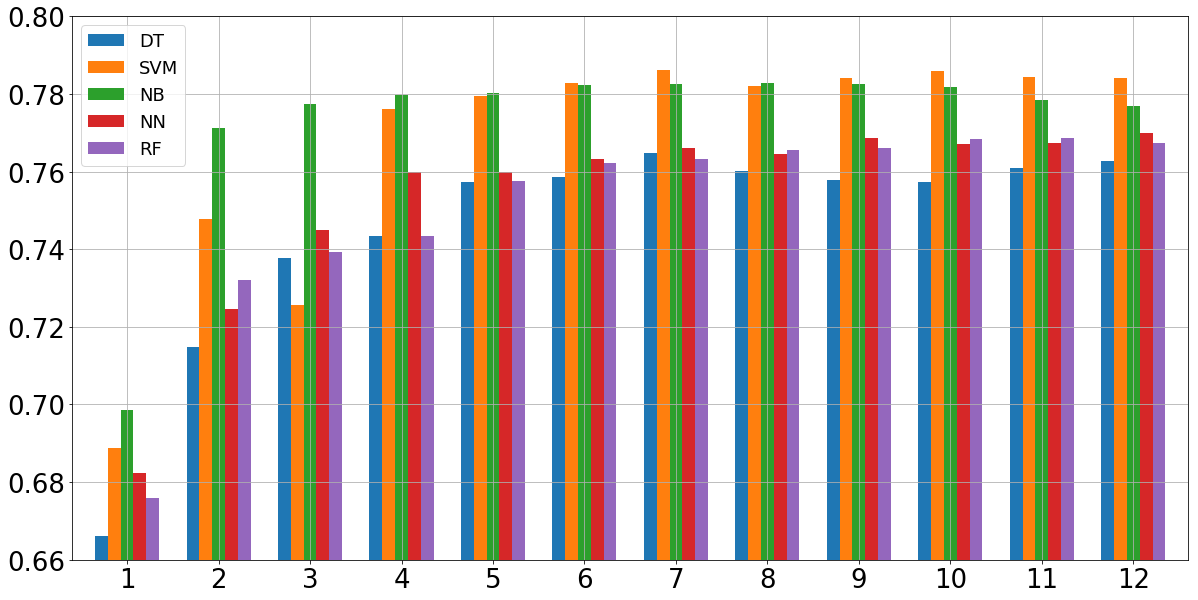

In [366]:
lst = []
for i in range(12):
    temp = []
    temp.append(dt_size_group['accuracy'].values[i])
    temp.append(svm_size_group['accuracy'].values[i])
    temp.append(nb_size_group['accuracy'].values[i])
    temp.append(nn_size_group['accuracy'].values[i])
    temp.append(rf_size_group['accuracy'].values[i])
    lst.append(temp)
        
        

df = pd.DataFrame(lst, columns=['DT', 'SVM', 'NB', 'NN', 'RF'], index= [1,2,3,4,5,6,7,8,9,10,11,12])
df.plot.bar(ylim=(0.66,0.80), figsize=(20,10),width=0.70, rot=0)
plt.grid(zorder=0)
plt.legend(loc='upper left')#, bbox_to_anchor=(0, 0.5))
plt.tick_params(axis='x', labelsize=26)
plt.tick_params(axis='y', labelsize=26)
plt.legend(loc=2, prop={'size': 18})

plt.show()

#df.plot.bar();

In [367]:
midx = pd.DataFrame()
midx = pd.concat([dt, svm, nn, nb, rf], ignore_index=True, sort=False)
midx = midx.sort_values(by='accuracy', ascending=False)
print(midx.shape)
#midx.to_csv('Summary.csv')
midx

(274, 4)


,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
61,7,0.788200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM


#chart = []
dtchart = midx.plot.scatter(x='size', y='accuracy', color='Green', label='Decision Trees');
#chart.append(dtchart)
rfchart = midx.plot.scatter(x='size', y='accuracy', color='Blue', label='Random Forest', ax=dtchart);
#chart.append(rfchart)
svmchart = midx.plot.scatter(x='size', y='accuracy', color='Red', label='Support Vector Machines', ax=rfchart);
#chart.append(svmchart)
nbchart = midx.plot.scatter(x='size', y='accuracy', color='Orange', label='Naive Bayes', ax=svmchart);
#chart.append(nbchart)

midx.plot.scatter(x='size', y='accuracy', color='Purple', label='Neural Networks', ax=nbchart);

#regions = pandas.factorize(midx.Region[id_range])
#regions_num = regions[0]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(midx['size'], ys=len(midx), midx['accuracy'])

ax.axes.set_yticklabels(midx['combs'])

plt.show()

In [368]:
size1 = midx.loc[midx['size'] == 1]
size1

,size,accuracy,combs,clf
215,1,0.75730,['NumberChildrenAtHome'],NB
101,1,0.75680,['NumberChildrenAtHome'],SVM
156,1,0.73080,['NumberChildrenAtHome'],NN
270,1,0.70540,['NumberChildrenAtHome'],RF
216,1,0.69170,['NumberCarsOwned'],NB
217,1,0.67255,['JobType'],NB
218,1,0.67255,['Married'],NB
271,1,0.66620,['NumberCarsOwned'],RF
272,1,0.66620,['Income'],RF
109,1,0.66620,['EducationType'],SVM


groups = size1.groupby('clf')
items = {}
for name, group in groups:
    if name not in items:
        print(name)
        items[name] = group['accuracy'].values
        print(group['accuracy'].values)

combs_list = size1.combs.values
combs_list = clean_list(combs_list)
#combs_list = list(set(combs_list))
print(combs_list)

df = pd.DataFrame(items, index=combs_list)
ax = df.plot.barh()

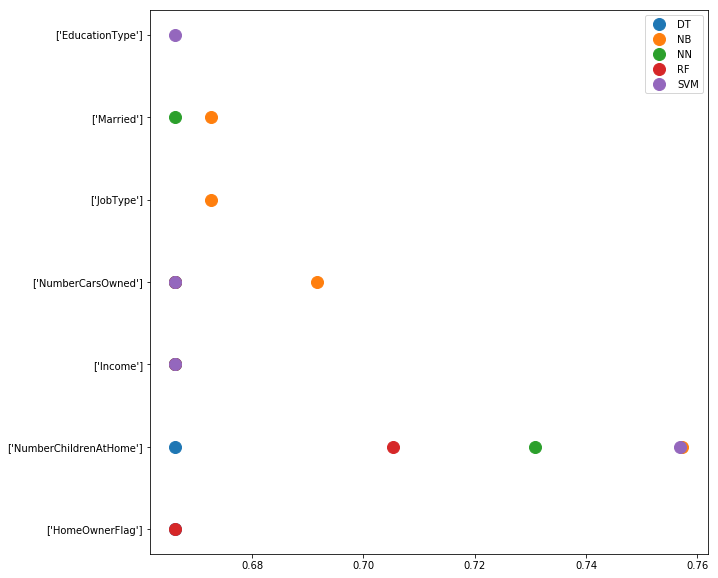

In [369]:
groups = size1.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [370]:
size2 = midx.loc[midx['size'] == 2]
size2

,size,accuracy,combs,clf
209,2,0.776625,"['NumberChildrenAtHome', 'Married']",NB
212,2,0.775850,"['NumberChildrenAtHome', 'Sex']",NB
213,2,0.768075,"['NumberChildrenAtHome', 'Income']",NB
214,2,0.764300,"['NumberChildrenAtHome', 'EducationType']",NB
99,2,0.758400,"['NumberChildrenAtHome', 'AgeBracket']",SVM
100,2,0.756800,"['NumberChildrenAtHome', 'JobType']",SVM
102,2,0.753800,"['NumberChildrenAtHome', 'Married']",SVM
258,2,0.752400,"['NumberChildrenAtHome', 'AgeBracket']",RF
42,2,0.741400,"['NumberChildrenAtHome', 'Sex']",DT
263,2,0.741400,"['NumberChildrenAtHome', 'Sex']",RF


In [371]:
clf_size2_group = size2.groupby(['combs']).mean()
clf_size2_group = clf_size2_group.sort_values(by='accuracy', ascending=False)
clf_size2_group

,size,accuracy
combs,,
"['NumberChildrenAtHome', 'Income']",2,0.745938
"['NumberChildrenAtHome', 'Married']",2,0.743406
"['NumberChildrenAtHome', 'AgeBracket']",2,0.742900
"['NumberChildrenAtHome', 'Sex']",2,0.740530
"['NumberChildrenAtHome', 'JobType']",2,0.739300
"['NumberChildrenAtHome', 'EducationType']",2,0.714367


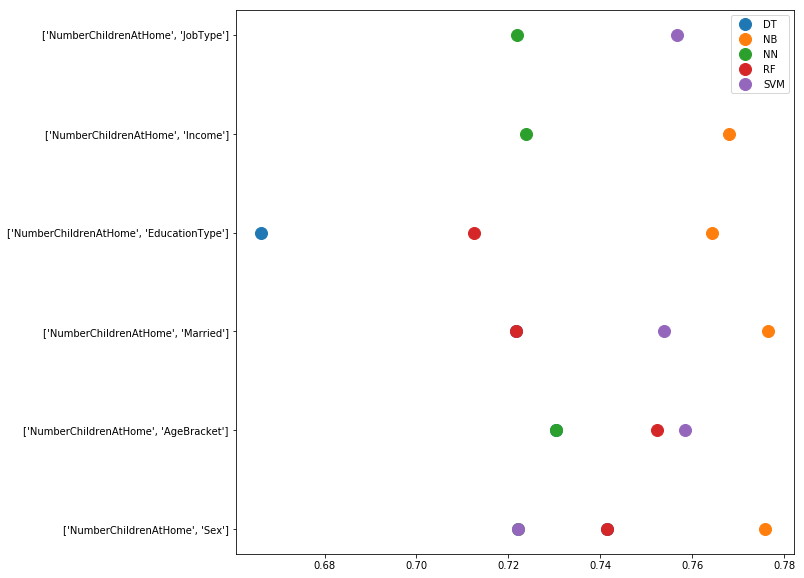

In [372]:
groups = size2.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [373]:
size3 = midx.loc[midx['size'] == 3]
size3

,size,accuracy,combs,clf
203,3,0.779350,"['NumberChildrenAtHome', 'Married', 'AgeBracket']",NB
206,3,0.777100,"['NumberChildrenAtHome', 'Sex', 'AgeBracket']",NB
210,3,0.776625,"['NumberChildrenAtHome', 'AreaCode', 'Married']",NB
211,3,0.776625,"['NumberChildrenAtHome', 'Married', 'ChildrenF...",NB
92,3,0.776000,"['NumberChildrenAtHome', 'Sex', 'Married']",SVM
151,3,0.753200,"['NumberChildrenAtHome', 'Sex', 'Married']",NN
103,3,0.752200,"['NumberChildrenAtHome', 'Married', 'Education...",SVM
154,3,0.742800,"['NumberChildrenAtHome', 'Married', 'ChildrenF...",NN
153,3,0.742800,"['NumberChildrenAtHome', 'Married', 'AgeBracket']",NN
260,3,0.742400,"['NumberChildrenAtHome', 'Sex', 'Married']",RF


In [374]:
clf_size3_group = size3.groupby(['combs']).mean()
clf_size3_group = clf_size3_group.sort_values(by='accuracy', ascending=False)
clf_size3_group

,size,accuracy
combs,,
"['NumberChildrenAtHome', 'Sex', 'AgeBracket']",3,0.777100
"['NumberChildrenAtHome', 'AreaCode', 'Married']",3,0.776625
"['NumberChildrenAtHome', 'Married', 'ChildrenFlag']",3,0.759713
"['NumberChildrenAtHome', 'Sex', 'Married']",3,0.753500
"['NumberChildrenAtHome', 'Married', 'EducationType']",3,0.744867
"['NumberChildrenAtHome', 'Married', 'AgeBracket']",3,0.734070
"['NumberChildrenAtHome', 'Married', 'Income']",3,0.726950


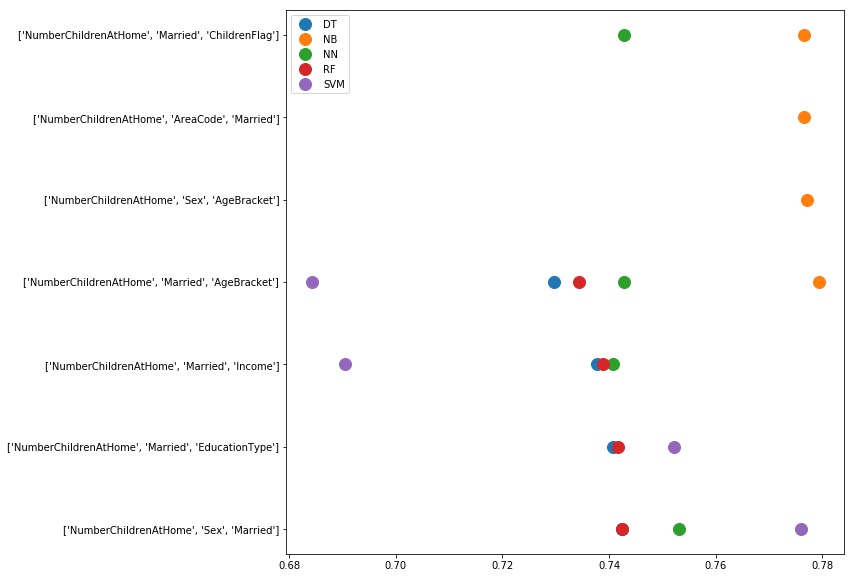

In [375]:
groups = size3.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [376]:
size4 = midx.loc[midx['size'] == 4]
size4

,size,accuracy,combs,clf
199,4,0.779600,"['NumberChildrenAtHome', 'Married', 'Country',...",NB
200,4,0.779600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'M...",NB
202,4,0.779575,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Mar...",NB
201,4,0.779575,"['NumberChildrenAtHome', 'AreaCode', 'Married'...",NB
91,4,0.777600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",SVM
93,4,0.776000,"['NumberChildrenAtHome', 'Married', 'Education...",SVM
95,4,0.775600,"['NumberChildrenAtHome', 'Married', 'JobType',...",SVM
94,4,0.775600,"['NumberChildrenAtHome', 'Married', 'Income', ...",SVM
137,4,0.764200,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",NN
142,4,0.762400,"['NumberChildrenAtHome', 'Married', 'JobType',...",NN


In [377]:
clf_size4_group = size4.groupby(['combs']).mean()
clf_size4_group = clf_size4_group.sort_values(by='accuracy', ascending=False)
clf_size4_group

,size,accuracy
combs,,
"['NumberChildrenAtHome', 'Married', 'Country', 'AgeBracket']",4,0.779600
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Married', 'AgeBracket']",4,0.779600
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Married', 'AgeBracket']",4,0.779575
"['NumberChildrenAtHome', 'Married', 'JobType', 'AgeBracket']",4,0.769000
"['NumberChildrenAtHome', 'AreaCode', 'Married', 'AgeBracket']",4,0.765988
"['NumberChildrenAtHome', 'Sex', 'Married', 'AgeBracket']",4,0.762300
"['NumberChildrenAtHome', 'Married', 'EducationType', 'AgeBracket']",4,0.751400
"['NumberChildrenAtHome', 'Married', 'Income', 'AgeBracket']",4,0.750667
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex', 'Married']",4,0.748400


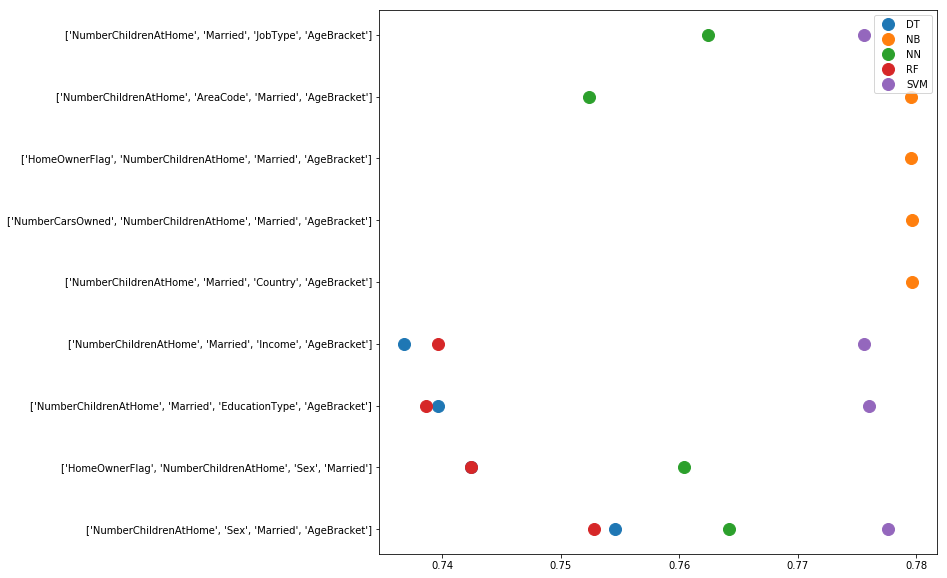

In [378]:
groups = size4.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [379]:
size5 = midx.loc[midx['size'] == 5]
size5

,size,accuracy,combs,clf
71,5,0.785000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
194,5,0.780925,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",NB
196,5,0.780625,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",NB
84,5,0.780600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
197,5,0.779800,"['NumberCarsOwned', 'NumberChildrenAtHome', 'M...",NB
198,5,0.779775,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",NB
90,5,0.777800,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
96,5,0.774600,"['NumberChildrenAtHome', 'Sex', 'Married', 'In...",SVM
236,5,0.765600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",RF
7,5,0.765200,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",DT


In [380]:
clf_size5_group = size5.groupby(['combs']).mean()
clf_size5_group = clf_size5_group.sort_values(by='accuracy', ascending=False)
clf_size5_group

,size,accuracy
combs,,
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Married', 'AgeBracket', 'ChildrenFlag']",5,0.779800
"['NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'ChildrenFlag']",5,0.779775
"['NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'AgeBracket']",5,0.768405
"['NumberChildrenAtHome', 'Sex', 'Married', 'AgeBracket', 'ChildrenFlag']",5,0.766108
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType']",5,0.764600
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType']",5,0.764400
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket']",5,0.763950
"['NumberChildrenAtHome', 'Sex', 'Married', 'Income', 'AgeBracket']",5,0.759450
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'AgeBracket']",5,0.755533


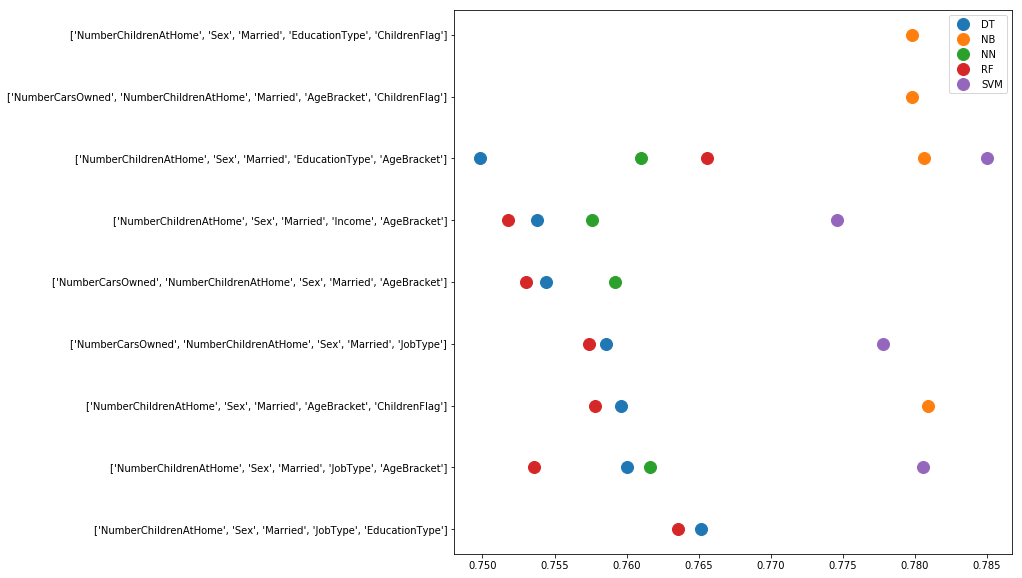

In [381]:
groups = size5.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [382]:
size6 = midx.loc[midx['size'] == 6]
size6

,size,accuracy,combs,clf
69,6,0.785000,"['NumberChildrenAtHome', 'Sex', 'Married', 'In...",SVM
75,6,0.784000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
181,6,0.782425,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",NB
182,6,0.782400,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",NB
186,6,0.782250,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",NB
190,6,0.781875,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",NB
81,6,0.781200,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",SVM
82,6,0.781200,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
223,6,0.769400,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",RF
227,6,0.768600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",RF


In [383]:
clf_size6_group = size6.groupby(['combs']).mean()
clf_size6_group = clf_size6_group.sort_values(by='accuracy', ascending=False)
clf_size6_group

,size,accuracy
combs,,
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket']",6,0.784000
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket']",6,0.781200
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Income', 'AgeBracket']",6,0.772525
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket', 'ChildrenFlag']",6,0.769165
"['NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Income', 'AgeBracket']",6,0.768025
"['NumberChildrenAtHome', 'Sex', 'Married', 'Income', 'AgeBracket', 'ChildrenFlag']",6,0.767400
"['NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'AgeBracket', 'ChildrenFlag']",6,0.767200
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket']",6,0.764600
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex', 'Married', 'AgeBracket', 'ChildrenFlag']",6,0.762300


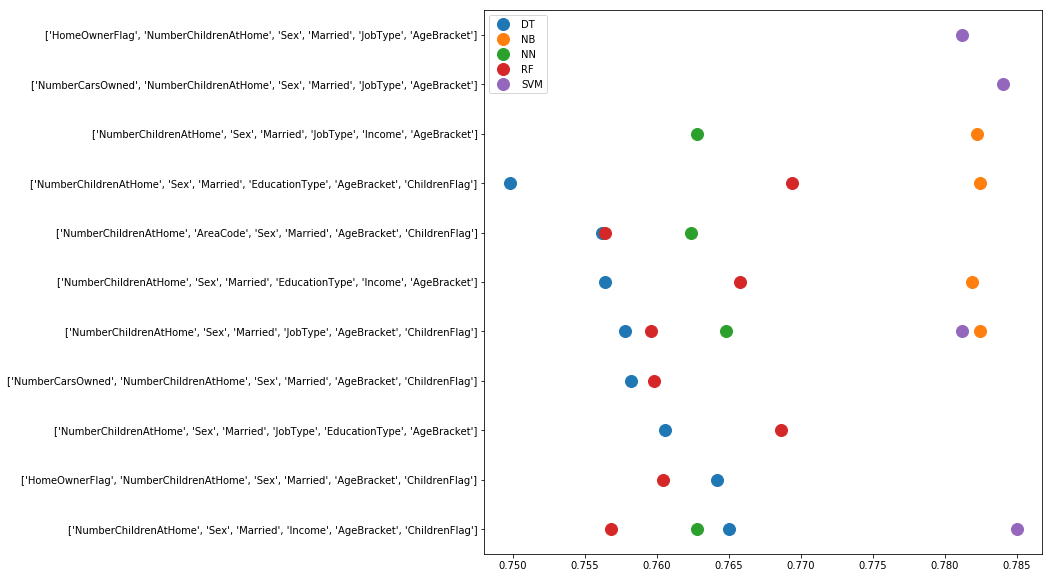

In [384]:
groups = size6.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [385]:
size7 = midx.loc[midx['size'] == 7]
size7

,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
61,7,0.788200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
168,7,0.782950,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",NB
173,7,0.782675,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",NB
175,7,0.782525,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",NB
177,7,0.782500,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",NB
180,7,0.782450,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",NB
184,7,0.782350,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",NB


In [386]:
clf_size7_group = size7.groupby(['combs']).mean()
clf_size7_group = clf_size7_group.sort_values(by='accuracy', ascending=False)
clf_size7_group

,size,accuracy
combs,,
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Income', 'AgeBracket', 'ChildrenFlag']",7,0.789600
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket', 'ChildrenFlag']",7,0.785338
"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'AgeBracket', 'ChildrenFlag']",7,0.782525
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Country', 'AgeBracket']",7,0.778600
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket']",7,0.776800
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Income', 'AgeBracket']",7,0.775975
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Country', 'AgeBracket', 'ChildrenFlag']",7,0.775633
"['NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",7,0.775000
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket', 'ChildrenFlag']",7,0.773917


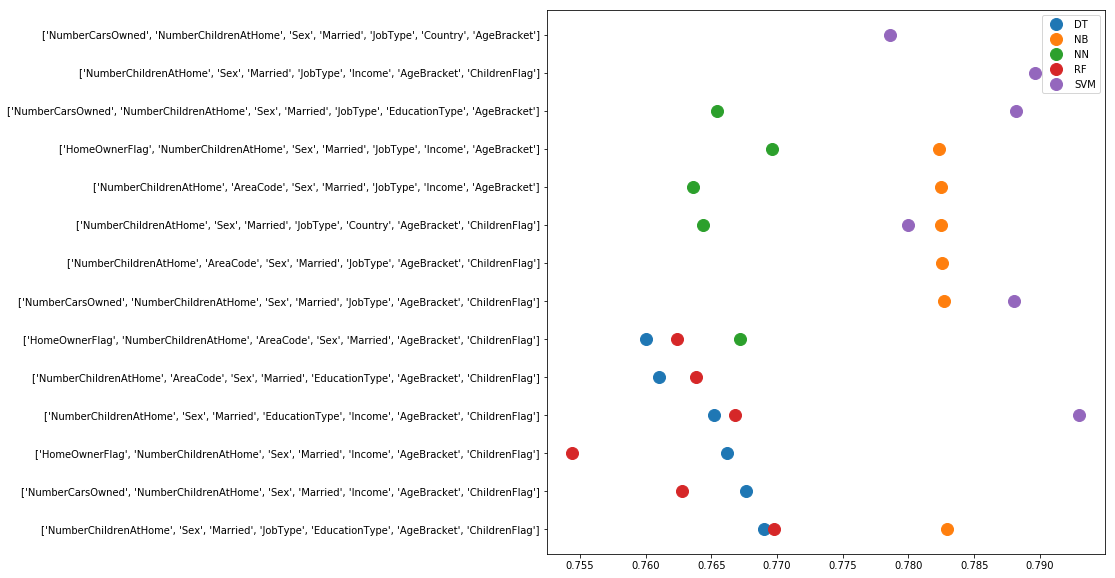

In [387]:
groups = size7.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [388]:
size8 = midx.loc[midx['size'] == 8]
size8

,size,accuracy,combs,clf
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
165,8,0.783100,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",NB
78,8,0.783000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
166,8,0.782975,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",NB
170,8,0.782875,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",NB
172,8,0.782700,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",NB
174,8,0.782525,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",NB
179,8,0.782475,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",NB
183,8,0.782375,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",NB


In [389]:
clf_size8_group = size8.groupby(['combs']).mean()
clf_size8_group = clf_size8_group.sort_values(by='accuracy', ascending=False)
clf_size8_group

,size,accuracy
combs,,
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket', 'ChildrenFlag']",8,0.790400
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",8,0.789400
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket', 'ChildrenFlag']",8,0.783100
"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'EducationType', 'Country', 'AgeBracket', 'ChildrenFlag']",8,0.782875
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Country', 'AgeBracket', 'ChildrenFlag']",8,0.781438
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket', 'ChildrenFlag']",8,0.780400
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Country', 'AgeBracket']",8,0.779800
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Country', 'AgeBracket', 'ChildrenFlag']",8,0.776787
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'AgeBracket', 'ChildrenFlag']",8,0.774787


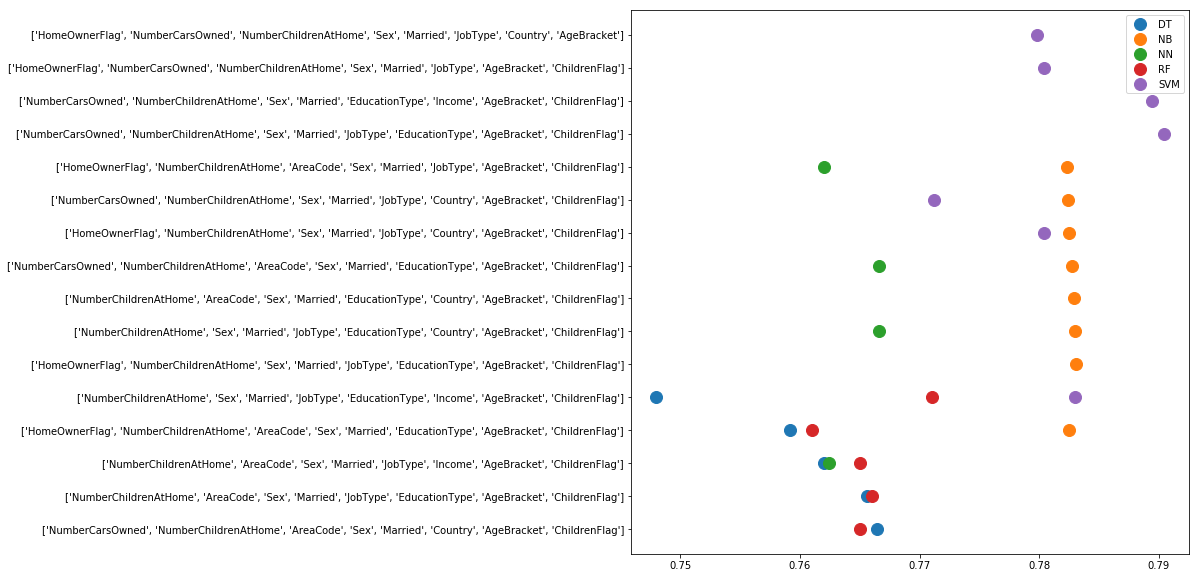

In [390]:
groups = size8.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [391]:
size9 = midx.loc[midx['size'] == 9]
size9

,size,accuracy,combs,clf
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
65,9,0.787400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
76,9,0.783800,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
164,9,0.783275,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",NB
169,9,0.782900,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
171,9,0.782850,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",NB
176,9,0.782500,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
178,9,0.782475,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",NB
187,9,0.782225,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",NB


In [392]:
clf_size9_group = size9.groupby(['combs']).mean()
clf_size9_group = clf_size9_group.sort_values(by='accuracy', ascending=False)
clf_size9_group

,size,accuracy
combs,,
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",9,0.787600
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",9,0.783800
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'EducationType', 'AgeBracket', 'ChildrenFlag']",9,0.782900
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",9,0.782800
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Country', 'AgeBracket', 'ChildrenFlag']",9,0.782350
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'Country', 'Income', 'AgeBracket']",9,0.782225
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'AgeBracket', 'ChildrenFlag']",9,0.779500
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'AgeBracket', 'ChildrenFlag']",9,0.774137
"['NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'EducationType', 'Country', 'AgeBracket', 'ChildrenFlag']",9,0.774025


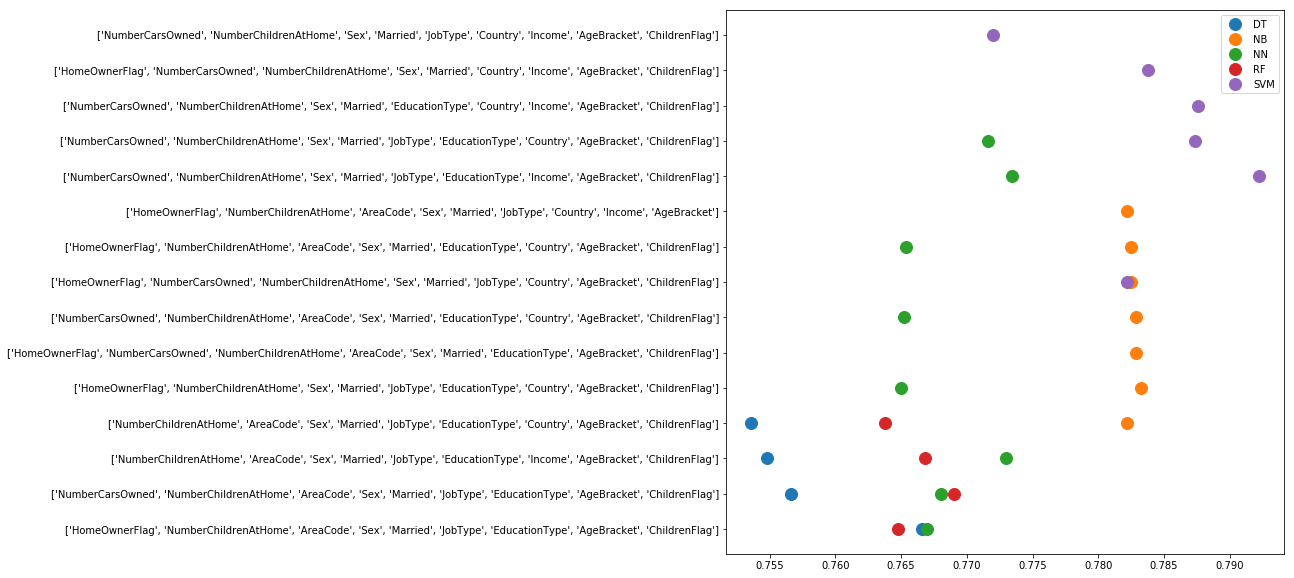

In [393]:
groups = size9.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [394]:
size10 = midx.loc[midx['size'] == 10]
size10

,size,accuracy,combs,clf
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
66,10,0.786600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
67,10,0.786400,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",SVM
68,10,0.786400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",SVM
72,10,0.784400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",SVM
167,10,0.782975,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
189,10,0.782025,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",NB
191,10,0.781750,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
192,10,0.781700,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",NB
193,10,0.780950,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB


In [395]:
clf_size10_group = size10.groupby(['combs']).mean()
clf_size10_group = clf_size10_group.sort_values(by='accuracy', ascending=False)
clf_size10_group

,size,accuracy
combs,,
"['NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",10,0.784400
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'Country', 'AgeBracket', 'ChildrenFlag']",10,0.781750
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",10,0.780800
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",10,0.778300
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'EducationType', 'Country', 'AgeBracket', 'ChildrenFlag']",10,0.777087
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",10,0.776300
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket', 'ChildrenFlag']",10,0.774875
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",10,0.773050
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'AgeBracket', 'ChildrenFlag']",10,0.770808


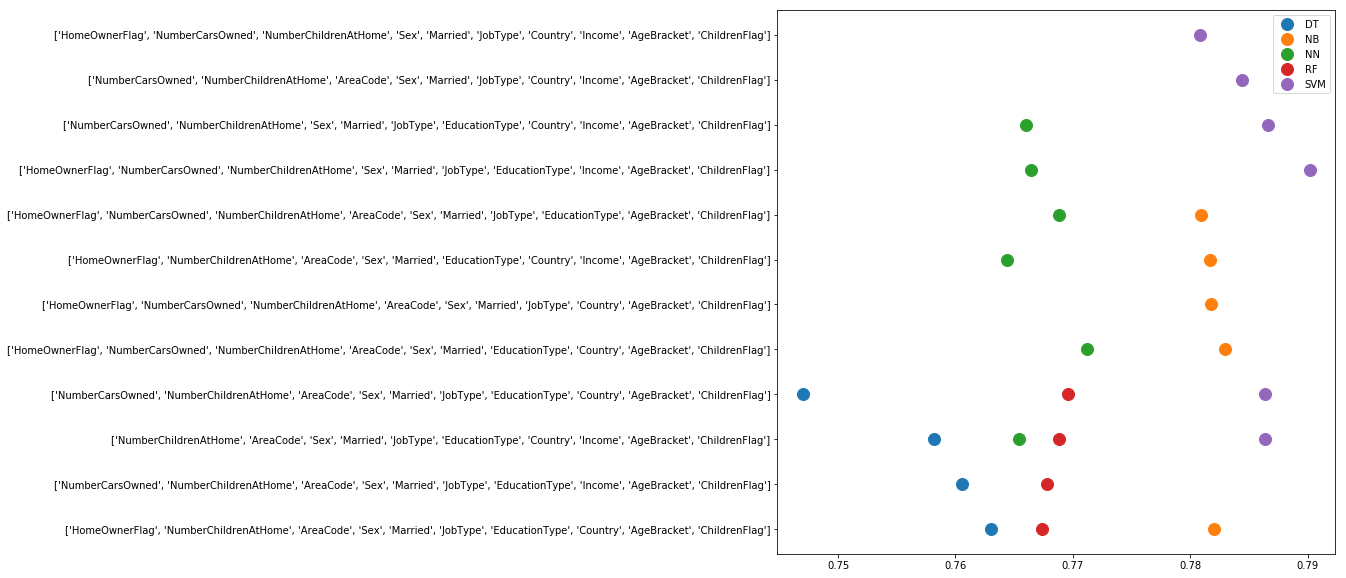

In [396]:
groups = size10.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [397]:
size11 = midx.loc[midx['size'] == 11]
size11

,size,accuracy,combs,clf
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
70,11,0.785000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",SVM
73,11,0.784200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
77,11,0.783400,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",SVM
80,11,0.781400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
195,11,0.780750,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
204,11,0.777825,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
205,11,0.777825,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",NB
207,11,0.776950,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",NB
110,11,0.775400,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are...",NN


In [398]:
clf_size11_group = size11.groupby(['combs']).mean()
clf_size11_group = clf_size11_group.sort_values(by='accuracy', ascending=False)
clf_size11_group

,size,accuracy
combs,,
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",11,0.784200
"['HomeOwnerFlag', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",11,0.775005
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",11,0.774200
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",11,0.774012
"['NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",11,0.771150
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",11,0.769300
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'AgeBracket', 'ChildrenFlag']",11,0.766887


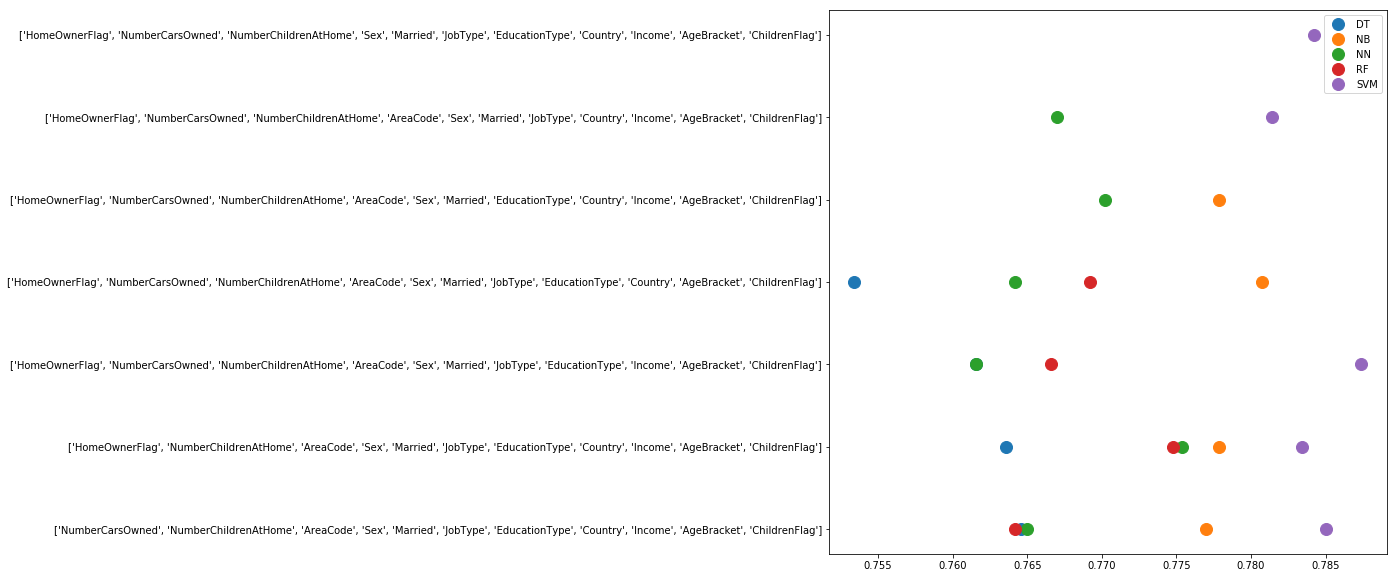

In [399]:
groups = size11.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [400]:
size12 = midx.loc[midx['size'] == 12]
size12

,size,accuracy,combs,clf
74,12,0.78420,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
208,12,0.77685,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NB
116,12,0.77000,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",NN
230,12,0.76740,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",RF
13,12,0.76260,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",DT


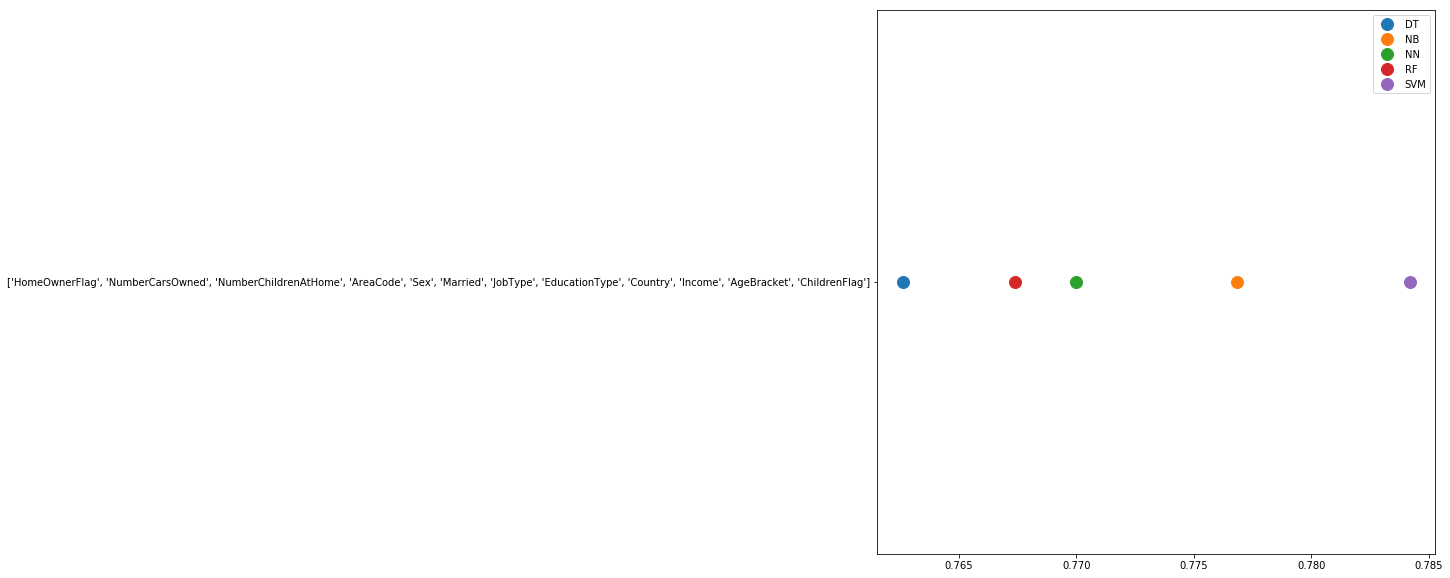

In [401]:
groups = size12.groupby('clf')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.accuracy, group.combs, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [402]:
clf_group = midx.groupby(['clf']).mean()
clf_group = clf_group.sort_values(by='accuracy', ascending=False)
clf_group = clf_group.drop(columns=['size'])
clf_group

,accuracy
clf,
NB,0.774399
SVM,0.769473
NN,0.754641
RF,0.751825
DT,0.746807


In [403]:
clf_group_max = midx.groupby(['clf']).head(1)
clf_group_max = clf_group_max.sort_values(by='accuracy', ascending=False)
clf_group_max = clf_group_max.groupby(['clf']).mean()
clf_group_max = clf_group_max.sort_values(by='accuracy', ascending=False)
clf_group_max = clf_group_max.drop(columns=['size'])
clf_group_max

,accuracy
clf,
SVM,0.793000
NB,0.783275
NN,0.775400
RF,0.774800
DT,0.769000


In [404]:
size_group = midx.groupby(['size']).mean()
size_group = size_group.sort_values(by='accuracy', ascending=False)
size_group

,accuracy
size,
9,0.773388
8,0.773198
10,0.773152
7,0.772829
12,0.772210
11,0.772007
6,0.767077
5,0.764720
4,0.760467


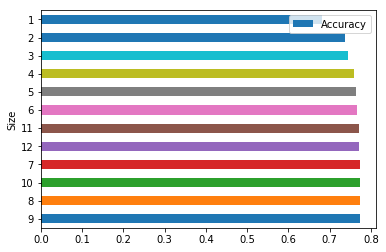

In [405]:
chart_size_group = size_group.accuracy.values
df = pd.DataFrame({'Size':[9,8,10,7,12,11,6,5,4,3,2,1], 'Accuracy': chart_size_group})
ax = df.plot.barh(x='Size', y='Accuracy')

In [406]:
size_group_max = midx.groupby(['size']).head(1)
size_group_max = size_group_max.sort_values(by='accuracy', ascending=False)
size_group_max

,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
69,6,0.785000,"['NumberChildrenAtHome', 'Sex', 'Married', 'In...",SVM
71,5,0.785000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
74,12,0.784200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
199,4,0.779600,"['NumberChildrenAtHome', 'Married', 'Country',...",NB
203,3,0.779350,"['NumberChildrenAtHome', 'Married', 'AgeBracket']",NB


In [407]:
clf_size_group = midx.groupby(['size', 'clf']).mean()
clf_size_group = clf_size_group.sort_values(by='accuracy', ascending=False)
clf_size_group

,,accuracy
size,clf,
7,SVM,0.786233
10,SVM,0.785800
11,SVM,0.784280
12,SVM,0.784200
9,SVM,0.784200
6,SVM,0.782850
8,NB,0.782669
9,NB,0.782636
7,NB,0.782575


In [408]:
combs_group = midx.groupby(['combs']).mean()
combs_group = combs_group.sort_values(by='accuracy', ascending=False)
combs_group

,size,accuracy
combs,,
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket', 'ChildrenFlag']",8,0.790400
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Income', 'AgeBracket', 'ChildrenFlag']",7,0.789600
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",8,0.789400
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",9,0.787600
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket', 'ChildrenFlag']",7,0.785338
"['NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",10,0.784400
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",11,0.784200
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket']",6,0.784000
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",9,0.783800


In [409]:
clf_combs_group = midx.groupby(['combs', 'clf']).mean()
clf_combs_group = clf_combs_group.sort_values(by='accuracy', ascending=False)
clf_combs_group

,,size,accuracy
combs,clf,,
"['NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",SVM,7,0.793000
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",SVM,9,0.792200
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket', 'ChildrenFlag']",SVM,8,0.790400
"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",SVM,10,0.790200
"['NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'Income', 'AgeBracket', 'ChildrenFlag']",SVM,7,0.789600
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Income', 'AgeBracket', 'ChildrenFlag']",SVM,8,0.789400
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'EducationType', 'AgeBracket']",SVM,7,0.788200
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'JobType', 'AgeBracket', 'ChildrenFlag']",SVM,7,0.788000
"['NumberCarsOwned', 'NumberChildrenAtHome', 'Sex', 'Married', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']",SVM,9,0.787600


In [410]:
midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False))]

,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
61,7,0.788200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM


In [411]:
midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('NumberCarsOwned' , case=False))]

,size,accuracy,combs,clf
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
61,7,0.788200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
65,9,0.787400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
66,10,0.786600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM


In [412]:
#unique_combs = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'AreaCode', 'Sex', 'Married', 'JobType', 'EducationType', 'Country', 'Income', 'AgeBracket', 'ChildrenFlag']
freq = {'HomeOwnerFlag':0, 'NumberCarsOwned':0, 'NumberChildrenAtHome':0, 'AreaCode':0, 'Sex':0, 'Married':0, 'JobType':0, 'EducationType':0, 'Country':0, 'Income':0, 'AgeBracket':0, 'ChildrenFlag':0}
count = 0

for k in freq.keys():
    for row in midx.combs:
        if row.find(k) != -1:
            freq[k] += 1
            count+=1

label = []
value = []
for k,v in freq.items():
    print(k + ': ' + str(v) + ', %' + str(v/len(midx)*100))
    label.append(k)
    value.append(v/len(midx)*100)

HomeOwnerFlag: 74, %27.00729927007299
NumberCarsOwned: 87, %31.751824817518248
NumberChildrenAtHome: 259, %94.52554744525547
AreaCode: 94, %34.306569343065696
Sex: 210, %76.64233576642336
Married: 239, %87.22627737226277
JobType: 131, %47.81021897810219
EducationType: 124, %45.25547445255474
Country: 75, %27.37226277372263
Income: 92, %33.57664233576642
AgeBracket: 215, %78.46715328467153
ChildrenFlag: 157, %57.299270072992705


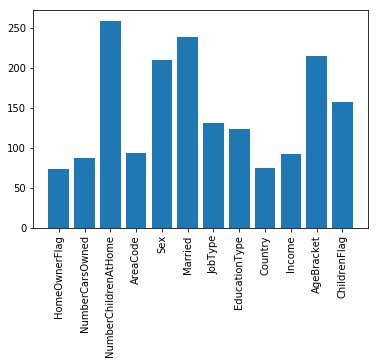

In [413]:
#df = pd.DataFrame(freq, index=[freq.keys()])
#ax = df.df.plot.barh(x='Features', y='Counts')

#plt.bar(list(freq.keys()), freq.values())
#plt.show()

#plt.barh(range(len(freq)), list(freq.values()), align='center')
#plt.xticks(range(len(freq)), list(freq.keys()))
#plt.show()

plt.bar(range(len(freq)), freq.values(), align='center')
plt.xticks(range(len(freq)), list(freq.keys()))
plt.xticks(rotation=90)

plt.show()

In [414]:
child = midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False))]
#child_group = child.groupby(['combs', 'clf']).mean()
#child_group = child_group.sort_values(by='accuracy', ascending=False)
#print(child_group.shape)
#child_group
print(child.shape)
child

(259, 4)


,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
61,7,0.788200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM


In [415]:
childMarried = midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('Married' , case=False))]
#childMarried_group = childMarried.groupby(['combs', 'clf']).mean()
#childMarried_group = childMarried_group.sort_values(by='accuracy', ascending=False)
#print(childMarried_group.shape)
#childMarried_group
print(childMarried.shape)
childMarried

(237, 4)


,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
61,7,0.788200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM


In [416]:
childMarriedAge = midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('Married' , case=False)) & (midx['combs'].str.contains('AgeBracket' , case=False))]
print(childMarriedAge.shape)
childMarriedAge

(210, 4)


,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
61,7,0.788200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM


In [417]:
childMarriedAge_size = midx.loc[(midx['size'] <= 4) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('Married' , case=False)) & (midx['combs'].str.contains('AgeBracket' , case=False))]
print(childMarriedAge_size.shape)
childMarriedAge_size

(22, 4)


,size,accuracy,combs,clf
199,4,0.779600,"['NumberChildrenAtHome', 'Married', 'Country',...",NB
200,4,0.779600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'M...",NB
202,4,0.779575,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Mar...",NB
201,4,0.779575,"['NumberChildrenAtHome', 'AreaCode', 'Married'...",NB
203,3,0.779350,"['NumberChildrenAtHome', 'Married', 'AgeBracket']",NB
91,4,0.777600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",SVM
93,4,0.776000,"['NumberChildrenAtHome', 'Married', 'Education...",SVM
95,4,0.775600,"['NumberChildrenAtHome', 'Married', 'JobType',...",SVM
94,4,0.775600,"['NumberChildrenAtHome', 'Married', 'Income', ...",SVM
137,4,0.764200,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",NN


In [418]:
childMarriedAgeSex = midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('Married' , case=False)) & (midx['combs'].str.contains('AgeBracket' , case=False))  & (midx['combs'].str.contains('Sex' , case=False))]
print(childMarriedAgeSex.shape)
childMarriedAgeSex

(191, 4)


,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
61,7,0.788200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM


In [419]:
childMarriedAgeSex_size = midx.loc[(midx['size'] <= 5) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('Married' , case=False)) & (midx['combs'].str.contains('AgeBracket' , case=False))  & (midx['combs'].str.contains('Sex' , case=False))]
print(childMarriedAgeSex_size.shape)
childMarriedAgeSex_size

(23, 4)


,size,accuracy,combs,clf
71,5,0.785000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
194,5,0.780925,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",NB
196,5,0.780625,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",NB
84,5,0.780600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
91,4,0.777600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",SVM
96,5,0.774600,"['NumberChildrenAtHome', 'Sex', 'Married', 'In...",SVM
236,5,0.765600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",RF
137,4,0.764200,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",NN
145,5,0.761600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",NN
147,5,0.761000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",NN


In [420]:
childMarriedAgeSexChildren = midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('Married' , case=False)) & (midx['combs'].str.contains('AgeBracket' , case=False))  & (midx['combs'].str.contains('Sex' , case=False))  & (midx['combs'].str.contains('ChildrenFlag' , case=False))]
print(childMarriedAgeSexChildren.shape)
childMarriedAgeSexChildren

(153, 4)


,size,accuracy,combs,clf
55,7,0.793000,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed...",SVM
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
60,8,0.789400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
63,9,0.787600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
65,9,0.787400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM


In [421]:
childMarriedAgeSexChildren_size = childMarriedAgeSexChildren.sort_values(by='size', ascending=True)
childMarriedAgeSexChildren_size

,size,accuracy,combs,clf
21,5,0.759600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",DT
194,5,0.780925,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",NB
250,5,0.757800,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ag...",RF
247,6,0.760400,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Sex...",RF
25,6,0.758200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",DT
249,6,0.759600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",RF
82,6,0.781200,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
248,6,0.759800,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",RF
141,6,0.762400,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",NN
140,6,0.762800,"['NumberChildrenAtHome', 'Sex', 'Married', 'In...",NN


In [422]:
childMarriedAgeSexChildrenJob = midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('Married' , case=False)) & (midx['combs'].str.contains('AgeBracket' , case=False))  & (midx['combs'].str.contains('Sex' , case=False))  & (midx['combs'].str.contains('ChildrenFlag' , case=False))  & (midx['combs'].str.contains('JobType' , case=False))]
print(childMarriedAgeSexChildrenJob.shape)
childMarriedAgeSexChildrenJob

(102, 4)


,size,accuracy,combs,clf
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
59,7,0.789600,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo...",SVM
62,7,0.788000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
65,9,0.787400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
66,10,0.786600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
67,10,0.786400,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",SVM
68,10,0.786400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",SVM


In [423]:
childMarriedAgeSexChildrenJobEduc = midx.loc[(midx['size'] >= 1) & (midx['combs'].str.contains('NumberChildrenAtHome', case=False)) & (midx['combs'].str.contains('Married' , case=False)) & (midx['combs'].str.contains('AgeBracket' , case=False))  & (midx['combs'].str.contains('Sex' , case=False))  & (midx['combs'].str.contains('ChildrenFlag' , case=False))  & (midx['combs'].str.contains('JobType' , case=False))  & (midx['combs'].str.contains('EducationType' , case=False))]
print(childMarriedAgeSexChildrenJobEduc.shape)
childMarriedAgeSexChildrenJobEduc

(72, 4)


,size,accuracy,combs,clf
56,9,0.792200,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
57,8,0.790400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
58,10,0.790200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
64,11,0.787400,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM
65,9,0.787400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
66,10,0.786600,"['NumberCarsOwned', 'NumberChildrenAtHome', 'S...",SVM
67,10,0.786400,"['NumberChildrenAtHome', 'AreaCode', 'Sex', 'M...",SVM
68,10,0.786400,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",SVM
70,11,0.785000,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A...",SVM
73,11,0.784200,"['HomeOwnerFlag', 'NumberCarsOwned', 'NumberCh...",SVM


In [ ]:
chart_size_group = size_group.accuracy.values
df = pd.DataFrame({'Size':[9,8,10,7,12,11,6,5,4,3,2,1], 'Accuracy': chart_size_group})
ax = df.plot.barh(x='Size', y='Accuracy')

In [561]:
def count_feature(midx):
    freq = {'HomeOwnerFlag':0, 'NumberCarsOwned':0, 'NumberChildrenAtHome':0, 'AreaCode':0, 'Sex':0, 'Married':0, 'JobType':0, 'EducationType':0, 'Country':0, 'Income':0, 'AgeBracket':0, 'ChildrenFlag':0}
    count = 0

    for k in freq.keys():
        for row in midx.combs:
            if row.find(k) != -1:
                freq[k] += 1
                count+=1

    label = []
    value = []
    for k,v in freq.items():
        print(k + ': ' + str(v) + ', %' + str(v/len(midx)*100))
        label.append(k)
        value.append(v/len(midx)*100)
        
    plt.bar(range(len(label)), value, align='center')
    plt.xticks(range(len(label)), label)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency (count / total items * 100)')
    plt.xlabel('Features')

    plt.show()
    
    return freq

HomeOwnerFlag: 2, %10.0
NumberCarsOwned: 5, %25.0
NumberChildrenAtHome: 5, %25.0
AreaCode: 0, %0.0
Sex: 0, %0.0
Married: 2, %10.0
JobType: 1, %5.0
EducationType: 1, %5.0
Country: 0, %0.0
Income: 4, %20.0
AgeBracket: 0, %0.0
ChildrenFlag: 0, %0.0


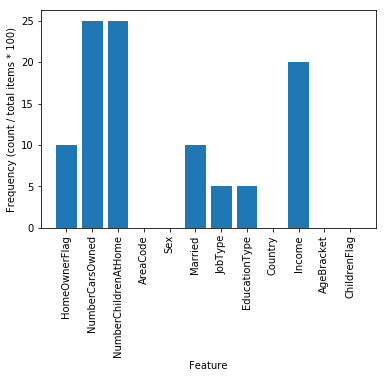

{'HomeOwnerFlag': 2,
 'NumberCarsOwned': 5,
 'NumberChildrenAtHome': 5,
 'AreaCode': 0,
 'Sex': 0,
 'Married': 2,
 'JobType': 1,
 'EducationType': 1,
 'Country': 0,
 'Income': 4,
 'AgeBracket': 0,
 'ChildrenFlag': 0}

In [562]:
count_feature(size1)

HomeOwnerFlag: 0, %0.0
NumberCarsOwned: 0, %0.0
NumberChildrenAtHome: 20, %100.0
AreaCode: 0, %0.0
Sex: 5, %25.0
Married: 4, %20.0
JobType: 2, %10.0
EducationType: 3, %15.0
Country: 0, %0.0
Income: 2, %10.0
AgeBracket: 4, %20.0
ChildrenFlag: 0, %0.0


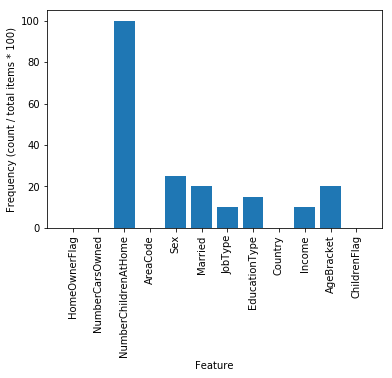

{'HomeOwnerFlag': 0,
 'NumberCarsOwned': 0,
 'NumberChildrenAtHome': 20,
 'AreaCode': 0,
 'Sex': 5,
 'Married': 4,
 'JobType': 2,
 'EducationType': 3,
 'Country': 0,
 'Income': 2,
 'AgeBracket': 4,
 'ChildrenFlag': 0}

In [563]:
count_feature(size2)

HomeOwnerFlag: 0, %0.0
NumberCarsOwned: 0, %0.0
NumberChildrenAtHome: 20, %100.0
AreaCode: 1, %5.0
Sex: 5, %25.0
Married: 19, %95.0
JobType: 0, %0.0
EducationType: 3, %15.0
Country: 0, %0.0
Income: 4, %20.0
AgeBracket: 6, %30.0
ChildrenFlag: 2, %10.0


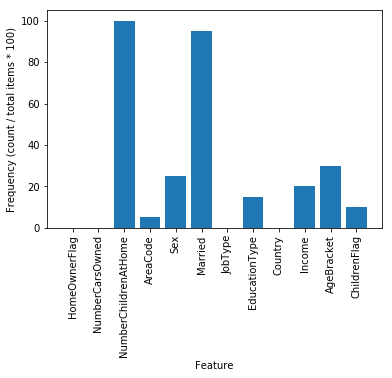

{'HomeOwnerFlag': 0,
 'NumberCarsOwned': 0,
 'NumberChildrenAtHome': 20,
 'AreaCode': 1,
 'Sex': 5,
 'Married': 19,
 'JobType': 0,
 'EducationType': 3,
 'Country': 0,
 'Income': 4,
 'AgeBracket': 6,
 'ChildrenFlag': 2}

In [564]:
count_feature(size3)

HomeOwnerFlag: 4, %20.0
NumberCarsOwned: 1, %5.0
NumberChildrenAtHome: 20, %100.0
AreaCode: 2, %10.0
Sex: 7, %35.0
Married: 20, %100.0
JobType: 2, %10.0
EducationType: 3, %15.0
Country: 1, %5.0
Income: 3, %15.0
AgeBracket: 17, %85.0
ChildrenFlag: 0, %0.0


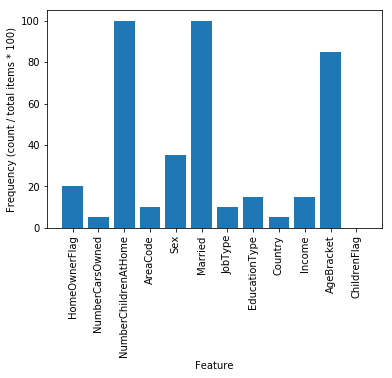

{'HomeOwnerFlag': 4,
 'NumberCarsOwned': 1,
 'NumberChildrenAtHome': 20,
 'AreaCode': 2,
 'Sex': 7,
 'Married': 20,
 'JobType': 2,
 'EducationType': 3,
 'Country': 1,
 'Income': 3,
 'AgeBracket': 17,
 'ChildrenFlag': 0}

In [565]:
count_feature(size4)

HomeOwnerFlag: 0, %0.0
NumberCarsOwned: 7, %26.923076923076923
NumberChildrenAtHome: 26, %100.0
AreaCode: 0, %0.0
Sex: 25, %96.15384615384616
Married: 26, %100.0
JobType: 9, %34.61538461538461
EducationType: 8, %30.76923076923077
Country: 0, %0.0
Income: 4, %15.384615384615385
AgeBracket: 20, %76.92307692307693
ChildrenFlag: 5, %19.230769230769234


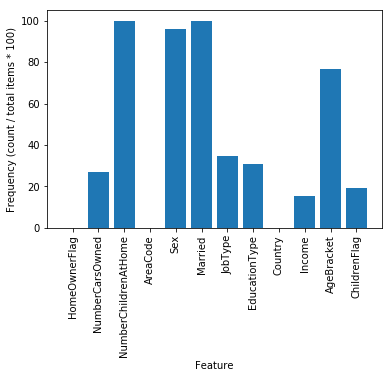

{'HomeOwnerFlag': 0,
 'NumberCarsOwned': 7,
 'NumberChildrenAtHome': 26,
 'AreaCode': 0,
 'Sex': 25,
 'Married': 26,
 'JobType': 9,
 'EducationType': 8,
 'Country': 0,
 'Income': 4,
 'AgeBracket': 20,
 'ChildrenFlag': 5}

In [566]:
count_feature(size5)

HomeOwnerFlag: 3, %10.714285714285714
NumberCarsOwned: 3, %10.714285714285714
NumberChildrenAtHome: 28, %100.0
AreaCode: 3, %10.714285714285714
Sex: 28, %100.0
Married: 28, %100.0
JobType: 11, %39.285714285714285
EducationType: 8, %28.57142857142857
Country: 0, %0.0
Income: 9, %32.142857142857146
AgeBracket: 28, %100.0
ChildrenFlag: 19, %67.85714285714286


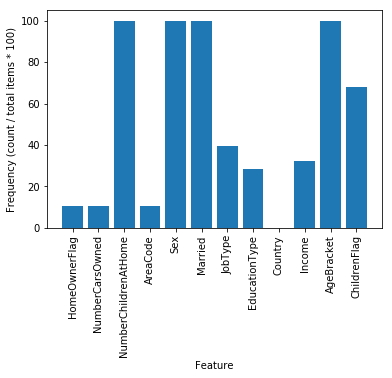

{'HomeOwnerFlag': 3,
 'NumberCarsOwned': 3,
 'NumberChildrenAtHome': 28,
 'AreaCode': 3,
 'Sex': 28,
 'Married': 28,
 'JobType': 11,
 'EducationType': 8,
 'Country': 0,
 'Income': 9,
 'AgeBracket': 28,
 'ChildrenFlag': 19}

In [567]:
count_feature(size6)

HomeOwnerFlag: 7, %24.137931034482758
NumberCarsOwned: 7, %24.137931034482758
NumberChildrenAtHome: 29, %100.0
AreaCode: 8, %27.586206896551722
Sex: 29, %100.0
Married: 29, %100.0
JobType: 17, %58.620689655172406
EducationType: 10, %34.48275862068966
Country: 4, %13.793103448275861
Income: 12, %41.37931034482759
AgeBracket: 29, %100.0
ChildrenFlag: 22, %75.86206896551724


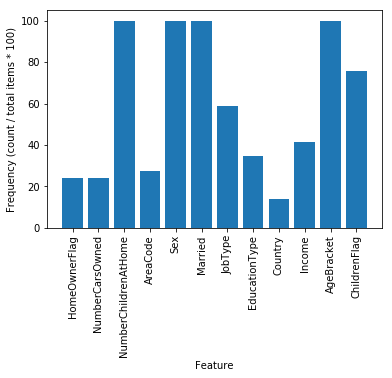

{'HomeOwnerFlag': 7,
 'NumberCarsOwned': 7,
 'NumberChildrenAtHome': 29,
 'AreaCode': 8,
 'Sex': 29,
 'Married': 29,
 'JobType': 17,
 'EducationType': 10,
 'Country': 4,
 'Income': 12,
 'AgeBracket': 29,
 'ChildrenFlag': 22}

In [568]:
count_feature(size7)

HomeOwnerFlag: 10, %34.48275862068966
NumberCarsOwned: 10, %34.48275862068966
NumberChildrenAtHome: 29, %100.0
AreaCode: 15, %51.724137931034484
Sex: 29, %100.0
Married: 29, %100.0
JobType: 20, %68.96551724137932
EducationType: 16, %55.172413793103445
Country: 10, %34.48275862068966
Income: 7, %24.137931034482758
AgeBracket: 29, %100.0
ChildrenFlag: 28, %96.55172413793103


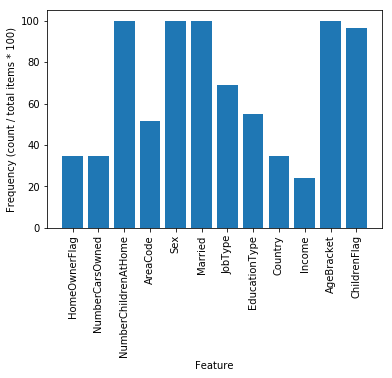

{'HomeOwnerFlag': 10,
 'NumberCarsOwned': 10,
 'NumberChildrenAtHome': 29,
 'AreaCode': 15,
 'Sex': 29,
 'Married': 29,
 'JobType': 20,
 'EducationType': 16,
 'Country': 10,
 'Income': 7,
 'AgeBracket': 29,
 'ChildrenFlag': 28}

In [569]:
count_feature(size8)

HomeOwnerFlag: 12, %41.37931034482759
NumberCarsOwned: 15, %51.724137931034484
NumberChildrenAtHome: 29, %100.0
AreaCode: 18, %62.06896551724138
Sex: 29, %100.0
Married: 29, %100.0
JobType: 22, %75.86206896551724
EducationType: 24, %82.75862068965517
Country: 17, %58.620689655172406
Income: 9, %31.03448275862069
AgeBracket: 29, %100.0
ChildrenFlag: 28, %96.55172413793103


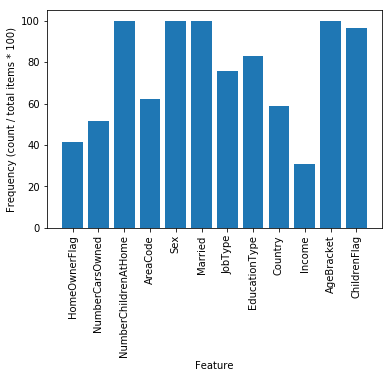

{'HomeOwnerFlag': 12,
 'NumberCarsOwned': 15,
 'NumberChildrenAtHome': 29,
 'AreaCode': 18,
 'Sex': 29,
 'Married': 29,
 'JobType': 22,
 'EducationType': 24,
 'Country': 17,
 'Income': 9,
 'AgeBracket': 29,
 'ChildrenFlag': 28}

In [570]:
count_feature(size9)

HomeOwnerFlag: 13, %52.0
NumberCarsOwned: 16, %64.0
NumberChildrenAtHome: 25, %100.0
AreaCode: 20, %80.0
Sex: 25, %100.0
Married: 25, %100.0
JobType: 21, %84.0
EducationType: 22, %88.0
Country: 19, %76.0
Income: 14, %56.00000000000001
AgeBracket: 25, %100.0
ChildrenFlag: 25, %100.0


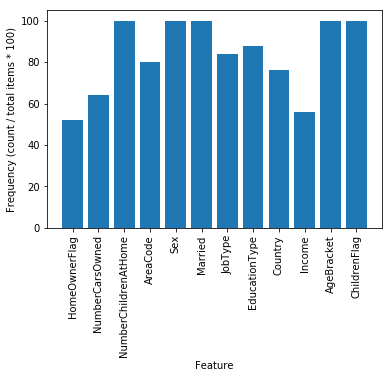

{'HomeOwnerFlag': 13,
 'NumberCarsOwned': 16,
 'NumberChildrenAtHome': 25,
 'AreaCode': 20,
 'Sex': 25,
 'Married': 25,
 'JobType': 21,
 'EducationType': 22,
 'Country': 19,
 'Income': 14,
 'AgeBracket': 25,
 'ChildrenFlag': 25}

In [571]:
count_feature(size10)

HomeOwnerFlag: 18, %78.26086956521739
NumberCarsOwned: 18, %78.26086956521739
NumberChildrenAtHome: 23, %100.0
AreaCode: 22, %95.65217391304348
Sex: 23, %100.0
Married: 23, %100.0
JobType: 21, %91.30434782608695
EducationType: 21, %91.30434782608695
Country: 19, %82.6086956521739
Income: 19, %82.6086956521739
AgeBracket: 23, %100.0
ChildrenFlag: 23, %100.0


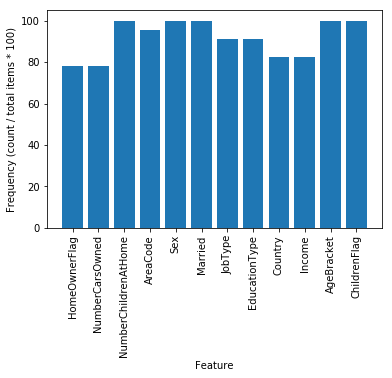

{'HomeOwnerFlag': 18,
 'NumberCarsOwned': 18,
 'NumberChildrenAtHome': 23,
 'AreaCode': 22,
 'Sex': 23,
 'Married': 23,
 'JobType': 21,
 'EducationType': 21,
 'Country': 19,
 'Income': 19,
 'AgeBracket': 23,
 'ChildrenFlag': 23}

In [572]:
count_feature(size11)

HomeOwnerFlag: 5, %100.0
NumberCarsOwned: 5, %100.0
NumberChildrenAtHome: 5, %100.0
AreaCode: 5, %100.0
Sex: 5, %100.0
Married: 5, %100.0
JobType: 5, %100.0
EducationType: 5, %100.0
Country: 5, %100.0
Income: 5, %100.0
AgeBracket: 5, %100.0
ChildrenFlag: 5, %100.0


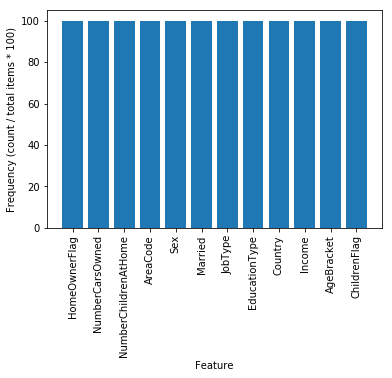

{'HomeOwnerFlag': 5,
 'NumberCarsOwned': 5,
 'NumberChildrenAtHome': 5,
 'AreaCode': 5,
 'Sex': 5,
 'Married': 5,
 'JobType': 5,
 'EducationType': 5,
 'Country': 5,
 'Income': 5,
 'AgeBracket': 5,
 'ChildrenFlag': 5}

In [573]:
count_feature(size12)